# Handwritten Digit Recognition
- adapted from https://github.com/amitrajitbose/handwritten-digit-recognition


### Necessary Imports

In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [3]:
!pip install google-colab

     |████████████████████████████████| 81kB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 71kB 3.0MB/s eta 0:00:011
     |████████████████████████████████| 112kB 2.2MB/s eta 0:00:01
     |████████████████████████████████| 768kB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 8.0MB 390kB/s eta 0:00:011
     |████████████████████████████████| 15.9MB 391kB/s eta 0:00:01
     |████████████████████████████████| 61kB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 491kB 2.0MB/s eta 0:00:01
     |████████████████████████████████| 245kB 4.6MB/s eta 0:00:01
     |████████████████████████████████| 122kB 1.3MB/s eta 0:00:01


  Created wheel for google-colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102291 sha256=c0dfed5400d50f5f7e32ed41998d8e347dc0f7ae8de06798d445b5f07fc16c25
  Stored in directory: /Users/elena/Library/Caches/pip/wheels/38/0d/59/701e300a337b2a2e07b27fe74dbfff0bc56ac58f711566ee67
  Created wheel for portpicker: filename=portpicker-1.2.0-cp37-none-any.whl size=13368 sha256=d7591476f4809a5c274f4d2413a1e152044c9661971158bb8e38fdbd2f6256f7
  Stored in directory: /Users/elena/Library/Caches/pip/wheels/4a/45/47/1e126be9d4605e71f00d6e6fb151611f2f4cb9770b050c7d2d
  Created wheel for tornado: filename=tornado-4.5.3-cp37-cp37m-macosx_10_9_x86_64.whl size=422223 sha256=79385651975516493fb351029fa3940bda781ee73040800e743606a241d8520b
  Stored in directory: /Users/elena/Library/Caches/pip/wheels/72/bf/f4/b68fa69596986881b397b18ff2b9af5f8181233aadcc9f76fd
  Created wheel for simplegeneric: filename=simplegeneric-0.8.1-cp37-none-any.whl size=5075 sha256=dbf9c0f367f2d1aacaa69c65234937c787b64d7

In [4]:
import os
from google.colab import drive

/Users/elena/anaconda2/envs/torch/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


### Download The Dataset & Define The Transforms

In [5]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw



Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw



Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw



Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw
Processing...
Done!


### Exploring The Data

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


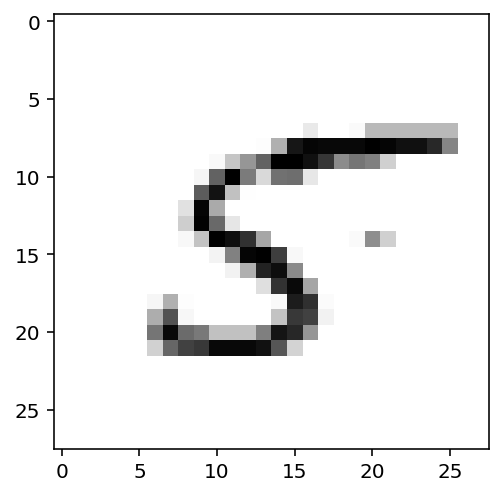

In [7]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

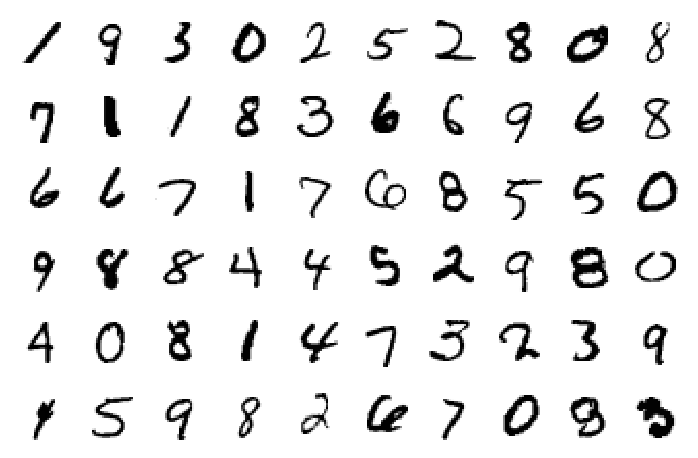

In [8]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [9]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [10]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [11]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 2.3738e-03,  2.3738e-03,  2.3738e-03,  ...,  2.3738e-03,
          2.3738e-03,  2.3738e-03],
        [ 1.8307e-05,  1.8307e-05,  1.8307e-05,  ...,  1.8307e-05,
          1.8307e-05,  1.8307e-05],
        [ 2.1192e-04,  2.1192e-04,  2.1192e-04,  ...,  2.1192e-04,
          2.1192e-04,  2.1192e-04],
        ...,
        [ 1.4289e-03,  1.4289e-03,  1.4289e-03,  ...,  1.4289e-03,
          1.4289e-03,  1.4289e-03],
        [-5.3521e-04, -5.3521e-04, -5.3521e-04,  ..., -5.3521e-04,
         -5.3521e-04, -5.3521e-04],
        [-1.9371e-03, -1.9371e-03, -1.9371e-03,  ..., -1.9371e-03,
         -1.9371e-03, -1.9371e-03]])


In [12]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [13]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0301, -0.0045,  0.0166,  ..., -0.0314,  0.0094,  0.0293],
        [ 0.0233, -0.0306, -0.0328,  ..., -0.0197, -0.0138, -0.0075],
        [-0.0308, -0.0263, -0.0259,  ..., -0.0062,  0.0017,  0.0052],
        ...,
        [ 0.0297,  0.0309, -0.0332,  ...,  0.0275, -0.0031, -0.0256],
        [ 0.0137,  0.0205,  0.0031,  ..., -0.0323,  0.0347, -0.0357],
        [ 0.0184,  0.0231, -0.0339,  ..., -0.0339,  0.0036,  0.0322]],
       requires_grad=True)
Gradient - tensor([[-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        ...,
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        [ 0.0022,  0.0022,  0.0022,  ...,  0.0022,  0.0022,  0.0022],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011]])


In [14]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0301, -0.0045,  0.0167,  ..., -0.0313,  0.0094,  0.0293],
        [ 0.0233, -0.0306, -0.0328,  ..., -0.0197, -0.0138, -0.0075],
        [-0.0308, -0.0263, -0.0259,  ..., -0.0062,  0.0017,  0.0052],
        ...,
        [ 0.0297,  0.0309, -0.0332,  ...,  0.0275, -0.0031, -0.0256],
        [ 0.0137,  0.0204,  0.0030,  ..., -0.0323,  0.0347, -0.0357],
        [ 0.0184,  0.0230, -0.0339,  ..., -0.0339,  0.0036,  0.0322]],
       requires_grad=True)


### Core Training Of Neural Network

In [16]:
import tqdm

In [18]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.6382603662561125
Epoch 1 - Training loss: 0.2859742457448229
Epoch 2 - Training loss: 0.22385910253868554
Epoch 3 - Training loss: 0.1810971234601412
Epoch 4 - Training loss: 0.15141980831962087
Epoch 5 - Training loss: 0.12902044818035638
Epoch 6 - Training loss: 0.11346033318980989
Epoch 7 - Training loss: 0.10111659060794312
Epoch 8 - Training loss: 0.09049932678132805
Epoch 9 - Training loss: 0.08147087670973878
Epoch 10 - Training loss: 0.07475941698761907
Epoch 11 - Training loss: 0.06735960688582981
Epoch 12 - Training loss: 0.061582124334321156
Epoch 13 - Training loss: 0.05887969804387579
Epoch 14 - Training loss: 0.0542472667231568

Training Time (in minutes) = 2.432295314470927


In [19]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 0


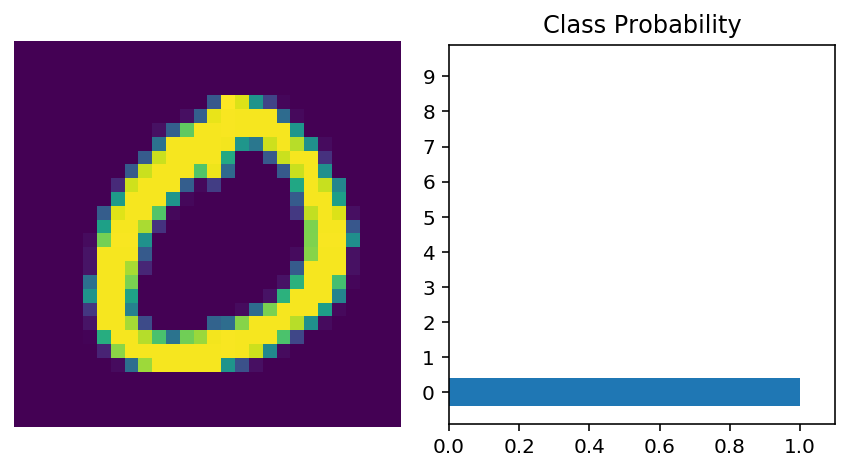

In [20]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [21]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9687


# Feature Extraction

In [30]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [32]:
feature_extractor = nn.Sequential(*list(model.children())[:-3])
print(feature_extractor)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
)


In [43]:
correct_count, all_count = 0, 0
l_imgs = []
l_features = []
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    l_imgs.append(images[i].numpy())
    # Turn off gradients to speed up this part
    with torch.no_grad():
        features = feature_extractor(img)
    l_features.append(features.numpy())
#     # Output of the network are log-probabilities, need to take exponential for probabilities
#     ps = torch.exp(logps)
#     probab = list(ps.numpy()[0])
#     pred_label = probab.index(max(probab))
#     true_label = labels.numpy()[i]
#     if(true_label == pred_label):
#       correct_count += 1
#     all_count += 1

In [45]:
l_imgs_np = np.array(l_imgs)
print(l_imgs_np.shape)
# print(len(l_imgs))
l_features_np = np.array(l_features)
print(l_features_np.shape)

(10000, 1, 28, 28)
(10000, 1, 64)


In [ ]:
import scipy.io as sio
sio.savemat('data_mnist_all_features.mat', {'names':all_idx, 'features':all_features})